# 🎥 Recommendation System 

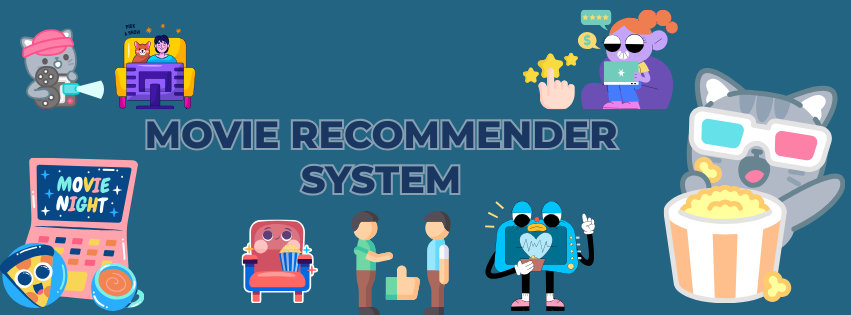

# 💻 About Dataset

📊 Context:
The dataset encompasses user ratings and free-text tagging from MovieLens, a movie recommendation platform. It comprises 20,002,263 ratings and 465,564 tag applications across 27,278 movies.

👥 User Information:
These data originated from 138,493 users randomly selected for inclusion. All users in the dataset have rated a minimum of 20 movies.

📅 Timeline:
The dataset spans user activities from January 09, 1995, to March 31, 2015. The dataset itself was generated on October 17, 2016.

🎬 MovieLens Universe:
The dataset provides insights into user preferences, offering a comprehensive view of movie ratings and tags, forming the basis for MovieLens recommendation services.

# 🔔 Important Libaries

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import time
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process


# 🎯 Data Loading

In [2]:
df = pd.read_csv('/kaggle/input/movielens-20m-dataset/rating.csv')
df

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


# 🏊 EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [4]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [5]:
df.describe()


,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [6]:
df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [7]:
df1 = df[['userId', 'movieId', 'rating']]

### Rating Count

In [8]:
df1 = df[['userId', 'movieId', 'rating']]
df1_rating_tm = pd.DataFrame(df1.groupby('rating').size(), columns = ['count'])
df1_rating_tm

,count
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [9]:
df1.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [10]:
num_of_user = len(df1['userId'].unique())
num_of_movie = len(df1['movieId'].unique())

print(f'There are {num_of_user} users and {num_of_movie} movies')
print(f"Min value of 'userId': {df1['userId'].min()} and Max value of 'userId': {df1['userId'].max()}")
print(f"Min value of 'movieId': {df1['movieId'].min()} and Max value of 'movieId': {df1['movieId'].max()}")
print(f"Min value of 'rating': {df1['rating'].min()} and Max value of 'rating': {df1['rating'].max()}")

There are 138493 users and 26744 movies
Min value of 'userId': 1 and Max value of 'userId': 138493
Min value of 'movieId': 1 and Max value of 'movieId': 131262
Min value of 'rating': 0.5 and Max value of 'rating': 5.0


In [11]:
df.movieId.values

array([    2,    29,    32, ..., 69644, 70286, 71619])

In [12]:
# create movie mapping id to make it chronological
#mapping_dict = {}
#for index, value in enumerate(df1['movieId'].unique()):
    #mapping_dict[value] = index
#print(mapping_dict)

#df1['movieIndex'] = df['movieId'].map(mapping_dict)
#df1.head(5)

# 😆 Shrinking Dataset
Since the dataset is too large to compute resulted will be O(N^2M), we need to perform shrinking by choosing the users who like maximum number of movies. 
Alternative, **Apache Spark** is an alternative option which has performed on Big Data to make a distributed job.

In [13]:
def shrinking_data(no_of_top_users):
    user_likes = df1.groupby('userId')['movieId'].count()
    top_users = user_likes.nlargest(no_of_top_users).index
    print(f"Top Users Index Values: {top_users}")
    top_users_df = df1[df1['userId'].isin(top_users)].reset_index(drop=True)
    print(f'Top {no_of_top_users} Dataframe')
    return top_users_df

**📌note:** The shrinking_data function selects and returns a subset of the dataframe df1, containing data only for the top users with the highest number of movie likes. The function prints the index values of these top users and the resulting filtered dataframe, providing a concise summary of the process.

In [14]:
no_of_top_users = 10000
final_top_users_df = shrinking_data(no_of_top_users)
final_top_users_df 

Top Users Index Values: Index([118205,   8405,  82418, 121535, 125794,  74142,  34576, 131904,  83090,
        59477,
       ...
        92433,  95536, 102921, 103578, 106776, 108493, 110559, 115351, 116360,
       117537],
      dtype='int64', name='userId', length=10000)
Top 10000 Dataframe


,userId,movieId,rating
0,11,1,4.5
1,11,10,2.5
2,11,19,3.5
3,11,32,5.0
4,11,39,4.5
...,...,...,...
7718626,138474,5401,1.0
7718627,138474,5449,4.0
7718628,138474,5459,4.0
7718629,138474,5460,5.0


In [15]:
final_top_users_df.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [16]:
final_top_users_df[['userId', 'movieId']]

,userId,movieId
0,11,1
1,11,10
2,11,19
3,11,32
4,11,39
...,...,...
7718626,138474,5401
7718627,138474,5449
7718628,138474,5459
7718629,138474,5460


#  ✂️ Data Splitting

In [17]:
# Split only the features
features_train, features_test, target_train, target_test = train_test_split(final_top_users_df[['userId', 'movieId']],final_top_users_df['rating'], test_size=0.2, random_state=42, stratify = final_top_users_df['rating'])

df_shrink_trainset = pd.concat([features_train, target_train], axis = 1).reset_index(drop=True)
df_shrink_testset = pd.concat([features_test, target_test], axis = 1).reset_index(drop=True)

In [18]:
df_shrink_trainset.shape

(6174904, 3)

In [19]:
df_shrink_testset.shape

(1543727, 3)

In [20]:
df_shrink_trainset[df_shrink_trainset['userId'] == 11]
df_shrink_testset[df_shrink_testset['userId'] == 11]

,userId,movieId,rating
15147,11,6377,5.0
55790,11,3114,5.0
97041,11,6264,2.5
103552,11,8578,2.0
115350,11,410,4.0
...,...,...,...
1473170,11,8865,4.0
1490085,11,47124,3.5
1504692,11,2012,5.0
1527450,11,384,3.5


# 🏇 Data Mapping

In [21]:
def create_mappings(dataframe_name):
    # user to movie mapping
    user2movie = dataframe_name.groupby('userId')['movieId'].unique().to_dict()

    # movie to user mapping
    movie2user = dataframe_name.groupby('movieId')['userId'].unique().to_dict()

    return user2movie, movie2user

user2movie, movie2user = create_mappings(df_shrink_trainset)

**📌 note:** The create_mappings function generates mappings between users and their rated movies, and between movies and the users who rated them, facilitating data organization for recommendation systems.

In [22]:
len(user2movie)

10000

In [23]:
def usermovierating_mappings(dataframe_name):
    # start time
    start_time = time.time() 
    # User-Movie to Rating Mapping
    usermovie2rating = dataframe_name.pivot_table(index='userId', columns='movieId', values='rating')
    
    # Fill NaN values with 0
    usermovie2rating.fillna(0, inplace=True)
    
    # end time
    end_time = time.time() 
    
    # Calculate the processing time
    processing_time = end_time - start_time  
    print(f"Processing time: {processing_time} seconds")

    return usermovie2rating


**📌 note:**`usermovierating_mappings` creates a user-movie rating matrix from the input dataframe by pivoting the data, where each row represents a user, each column represents a movie, and the cells contain the corresponding ratings. It then fills any missing values with 0.

**📌 note:** The line **usermovie2rating = dataframe_name.pivot_table(index='userId', columns='movieId', values='rating')** is creating a pivot table from the original DataFrame (df). It transforms the data, setting **user IDs as rows**, **movie IDs as columns**, and **filling the table with corresponding ratings**. This results in a new DataFrame (usermovie2rating) where users and movies are organized along rows and columns, making it easier to look up ratings for specific user-movie pairs.

### 🎃 Training Data Matrix

In [24]:
usermovie_to_rating_train = usermovierating_mappings(df_shrink_trainset)
usermovie_to_rating_train

Processing time: 11.289500713348389 seconds


movieId,1,2,3,4,5,6,7,8,9,10,...,131172,131176,131180,131231,131239,131243,131248,131258,131260,131262
userId,,,,,,,,,,,,,,,,,,,,,
11,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,4.0,0.0,0.0,0.0,2.0,4.0,3.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,4.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,5.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.0,3.5,3.0,0.0,0.0,0.0,2.5,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138404,5.0,2.5,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138406,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138411,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 🎃 Testing Data Matrix


In [25]:
usermovie_to_rating_test = usermovierating_mappings(df_shrink_testset)
usermovie_to_rating_test

Processing time: 6.839134931564331 seconds


movieId,1,2,3,4,5,6,7,8,9,10,...,131158,131164,131166,131168,131174,131241,131250,131252,131254,131256
userId,,,,,,,,,,,,,,,,,,,,,
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138406,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138411,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 🐆 Build Model

### 😏Cosine Similarity 
Cosine similarity measures the cosine of the angle between two vectors in a multi-dimensional space. In movie recommendation, it quantifies the similarity between movies based on user ratings, helping to identify similar movies that users might enjoy. 🎥🔍


Cosine similarity is commonly used in recommendation systems because it effectively captures the similarity between items (such as movies) based on their feature vectors (such as user ratings). It is particularly useful because it is invariant to the magnitude of the vectors and focuses solely on the direction, making it robust to varying scales and sparsity in the data.

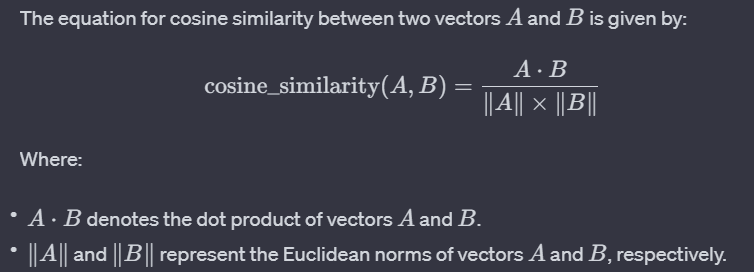




In [26]:
# Define a KNN model on cosine similarity
cf_knn_model= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)


# Fitting the model on our matrix
cf_knn_model.fit(usermovie_to_rating_train)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=10)

**📌note:** The NearestNeighbors model with metric='cosine' is chosen because it's tailored for cosine similarity, which is a common measure used in recommendation systems. By setting algorithm='brute', it performs a straightforward pairwise comparison suitable for smaller datasets. n_neighbors=10 specifies the number of similar items to consider, and n_jobs=-1 ensures efficient parallel processing using all available CPU cores. This configuration efficiently identifies similar items based on user ratings for personalized recommendations.

# 😎 Load Movie Metadata

In [27]:
movie_metadata = pd.read_csv("/kaggle/input/movielens-20m-dataset/movie.csv")

movie_metadata.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### 🌟 Traindataset After Shrinking

We performed shrink to avoid massive computation.

In [28]:
df_shrink_trainset

,userId,movieId,rating
0,11924,34405,2.0
1,89799,61236,4.0
2,1864,2448,3.0
3,113129,8961,5.0
4,8966,2423,3.0
...,...,...,...
6174899,347,6377,3.5
6174900,70945,3317,5.0
6174901,106894,1527,4.0
6174902,43679,3948,2.0


### 👊 Datasets Merging

In [29]:
def datamerge(df1, df2):
 
    merging = df1.merge(df2, on='movieId')
    
    return merging


In [30]:
movie_data = datamerge(df_shrink_trainset, movie_metadata)
movie_data.head(5)

,userId,movieId,rating,title,genres
0,11924,34405,2.0,Serenity (2005),Action|Adventure|Sci-Fi
1,89799,61236,4.0,Waltz with Bashir (Vals im Bashir) (2008),Animation|Documentary|Drama|War
2,1864,2448,3.0,Virus (1999),Horror|Sci-Fi
3,113129,8961,5.0,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy
4,8966,2423,3.0,Christmas Vacation (National Lampoon's Christm...,Comedy


In [31]:
movie_data.shape

(6174904, 5)

# 😯 Load Dataset for Movie Title and Genres

In [32]:
movie = pd.read_csv("/kaggle/input/movielens-20m-dataset/movie.csv")
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


# 😴 movie recommendations system Based On Nearest Neighbors

**Apply Transpose for Interchanging row and columns**

In [33]:
usermovie_to_rating_train.T

userId,11,24,54,58,91,96,104,116,131,134,...,138317,138325,138335,138382,138397,138404,138406,138411,138437,138474
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.5,4.0,4.0,5.0,0.0,3.5,0.0,3.0,2.0,4.0,...,3.0,5.0,0.0,3.0,0.0,5.0,4.0,0.0,4.0,5.0
2,0.0,0.0,3.0,0.0,3.5,0.0,0.0,2.0,1.0,0.0,...,3.0,3.0,0.0,4.0,0.0,2.5,0.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,3.0,4.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 😝 Movie Recommendation System

In [34]:
# Function to get recommendations for a movie
def movie_recommendation(movie_id, no_of_nearest_neighbors):
    # Find the nearest neighbors of the given movie
    distances, indices = cf_knn_model.kneighbors(usermovie_to_rating_train.T.iloc[:, movie_id].values.reshape(1, -1))
    # Get the indices of similar movies
    similar_movies_indices = indices.flatten()[1:]  # Exclude the first index (which is the movie itself)
    # Get the movie IDs of similar movies
    similar_movies_ids = usermovie_to_rating_train.columns[similar_movies_indices].tolist()
    print(f'similar_movie_ids: {similar_movies_ids}')
    
    cf_recs = []
    for i in similar_movies_ids:
            cf_recs.append({'Movie Id': i, 'Title':movie['title'][i]})
    
    # Select top number of recommendations needed
    df = pd.DataFrame(cf_recs, index = range(1,no_of_nearest_neighbors))
    
    return  df

# Example usage:
chosen_movie_id = 1
recommended_movies = movie_recommendation(chosen_movie_id, 10)  # Replace 123 with the movie ID for which you want recommendations
print('chosen movie based on movie id: ', movie['title'][chosen_movie_id])
print("Recommended movies:") 
recommended_movies

similar_movie_ids: [7107, 25802, 3310, 1953, 4079, 8596, 8723, 3317, 5040]
chosen movie based on movie id:  Jumanji (1995)
Recommended movies:


,Movie Id,Title
1,7107,They Drive by Night (1940)
2,25802,Love's Kitchen (2011)
3,3310,"Muppets Take Manhattan, The (1984)"
4,1953,Candleshoe (1977)
5,4079,When Brendan Met Trudy (2000)
6,8596,Harakiri (Seppuku) (1962)
7,8723,Scars of Dracula (1970)
8,3317,"Night to Remember, A (1958)"
9,5040,Wendigo (2001)


**📌note:** The `movie_recommendation` function generates movie recommendations based on the similarity of a given movie to other movies in the dataset. It uses a collaborative filtering model (cf_knn_model) to find the nearest neighbors of the specified movie, then retrieves the movie IDs of the similar movies.

# 😝 Movie Recommendation System with Distance

In [35]:
def movie_recommender_engine(movie_name, matrix, model_name, no_of_nearest_neighbors):
    
    # Extract input movie ID
    movie_id = process.extractOne(movie_name, movie['title'])[2]
    
    # Calculate neighbour distances
    distances, indices =  distances, indices = model_name.kneighbors(matrix.iloc[:, movie_id].values.reshape(1, -1))
    
    similar_movies_ids = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
    # List to store recommendations
    cf_recs = []
    for i in similar_movies_ids:
        cf_recs.append({'Title':movie['title'][i[0]],'Distance':i[1]})
    
    # Select top number of recommendations needed
    df = pd.DataFrame(cf_recs, index = range(1,no_of_nearest_neighbors))
     
    return df

In [36]:
movie_recommender_engine('Batman', usermovie_to_rating_train.T, cf_knn_model, 10)

,Title,Distance
1,Mr. Nanny (1993),0.500793
2,My Bodyguard (1980),0.500718
3,Melvin and Howard (1980),0.496316
4,"Road Warrior, The (Mad Max 2) (1981)",0.493298
5,My House in Umbria (2003),0.492907
6,Red Beard (Akahige) (1965),0.481609
7,"White Sound, The (Das weiße Rauschen) (2001)",0.481285
8,Go Figure (Va savoir) (2001),0.478160
9,American History X (1998),0.468807


**📌note:** 
The `movie_recommender_engine` function serves as a recommendation engine for movies based on their similarity to a given input movie. It takes inputs including the movie name, a matrix containing movie data, a model for similarity calculation, and the number of nearest neighbors to consider.

The function uses fuzzy string matching (process.extractOne) to extract the input movie's ID from the movie dataset. Then, it calculates the distances to the nearest neighbors using the specified model. Next, it sorts the similar movies based on their distances and stores them in a list along with their titles.

Finally, the function creates a dataframe containing the top recommended movies, including their titles and distances. This dataframe is then returned.

Overall, the function provides a convenient way to get recommendations for a movie based on its similarity to others in the dataset.

In [37]:
#len of trainingset
#N = len(user2movie)
#M = len(usermovie_to_rating_test['movieIndex'].unique())

